**This project used data from 2014 Mental Health Survey (https://osmihelp.org/research) to evaluate the correlation between company policy and willingness to seek mental health resources. The project aims at identifying company pocilies that have high correlation with willingness to seek mental health help. 
**

**1.Library loading**

In [1]:
#load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

**2.Data loading and cleaning **

In [2]:
#load survey data
mhdata = pd.read_csv('survey.csv')
mhdata.dropna()
mhdata.head(10)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [3]:
#preview data
mhdata.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
#check the number of responses for each survey question
mhdata.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [5]:
#"Gender" needs to be cleaned up
mhdata['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [6]:
# clean "Gender" data
male=["M","Male","m","Male-ish","maile","Mal","Male (CIS)","Make","Guy (-ish) ^_^","male leaning androgynous", "Male ", "Man", "msle", "Mail","cis male","Malr", "Cis Man","ostensibly male, unsure what that really means","male","something kinda male?", "Cis Male"]
mhdata['Gender'].replace(male, 'Male', inplace=True)
female = ['Female', 'female', "Trans-female","Cis Female",'F', 'f',  "queer/she/they",'Woman', 'Femake', 'Female (cis)', 'Cis Female', 'woman', 'femail', 'cis-female/femme', "Trans woman", "Female (trans)", "queer","Femake",'Female ']
mhdata['Gender'].replace(female, 'Female', inplace=True)
unknown = ["Nah","All","Enby", "fluid","Genderqueer","Androgyne","Agender","A little about you", "p",  "Unspecified","Neuter","non-binary" ]
mhdata['Gender'].replace(unknown, 'Unknown', inplace=True)


In [7]:
#check if all gender information has been cleaned up
mhdata['Gender'].value_counts()

Male       995
Female     253
Unknown     11
Name: Gender, dtype: int64

**3.Basic information**
Summarize respondent information and company information 

3.1. Survey question

In [8]:
#pull out survey questions to understand what each variable stands for
survey = pd.read_csv('subtitle.xls')
survey

,var,meaning
0,state,"If you live in the United States, which state..."
1,self_employed,Are you self-employed?
2,family_history,Do you have a family history of mental illness?
3,treatment,Have you sought treatment for a mental health...
4,work_interfere,"If you have a mental health condition, do you..."
5,no_employees,How many employees does your company or organ...
6,remote_work,Do you work remotely (outside of an office) a...
7,tech_company,Is your employer primarily a tech company/org...
8,benefits,Does your employer provide mental health bene...
9,care_options,Do you know the options for mental health car...


3.2. Respondent information

Text(0.5, 1.0, 'Gender distribution')

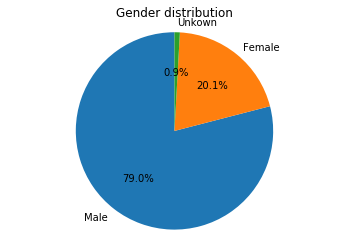

In [9]:
#gender information
f1, ax1 = plt.subplots()
ax1.pie(mhdata['Gender'].value_counts(),labels=['Male','Female','Unkown'],startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title("Gender distribution")


In [10]:
#age information
#the mean age of respondents is 32 years old and 50% of the resondents are between 27 and 36

age=mhdata['Age'].clip(18,80)
pd.DataFrame(data=age).describe()

,Age
count,1259.000000
mean,32.085782
std,7.574785
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,80.000000


3.3 Company profile

Text(0.5, 1.0, 'Tech Company?')

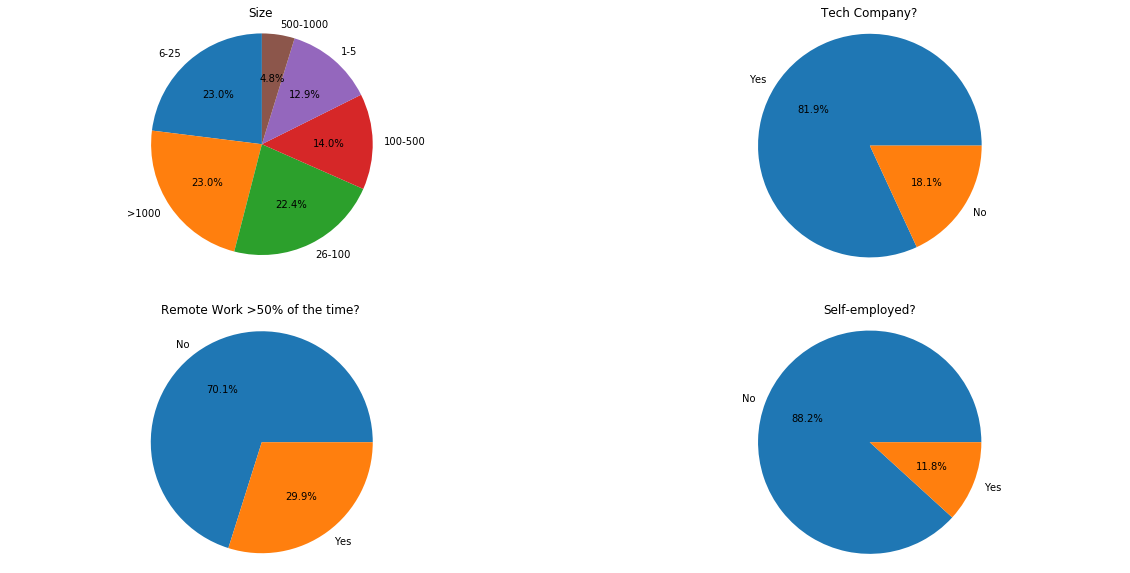

In [11]:
#use pie charts to visualize some company characteristics including size,industry, working style and self-employment
f3, ax3= plt.subplots(nrows=2,ncols=2, figsize=(20,10))
ax3[0,0].pie(list(mhdata['no_employees'].value_counts()),labels=['6-25', '>1000', '26-100', '100-500', '1-5', '500-1000'], autopct='%1.1f%%', startangle=90)
ax3[1,0].pie(list(mhdata['remote_work'].value_counts()),  labels=['No', 'Yes'],autopct='%1.1f%%', startangle=0)
ax3[0,1].pie(list(mhdata['tech_company'].value_counts()), labels=['Yes','No'], autopct='%1.1f%%', startangle=0)
ax3[1,1].pie(list(mhdata['self_employed'].value_counts()), labels=['No','Yes'],autopct='%1.1f%%', startangle=0)
ax3[0,0].axis('equal')
ax3[1,0].axis('equal')
ax3[1,1].axis('equal')
ax3[0,1].axis('equal')
ax3[0,0].set_title('Size') 
ax3[1,0].set_title('Remote Work >50% of the time?')
ax3[1,1].set_title('Self-employed?')
ax3[0,1].set_title('Tech Company?')


3.4 Company policy

Text(0.5, 1.0, 'How easy is it for you to take medical leave \n for a mental health condition?')

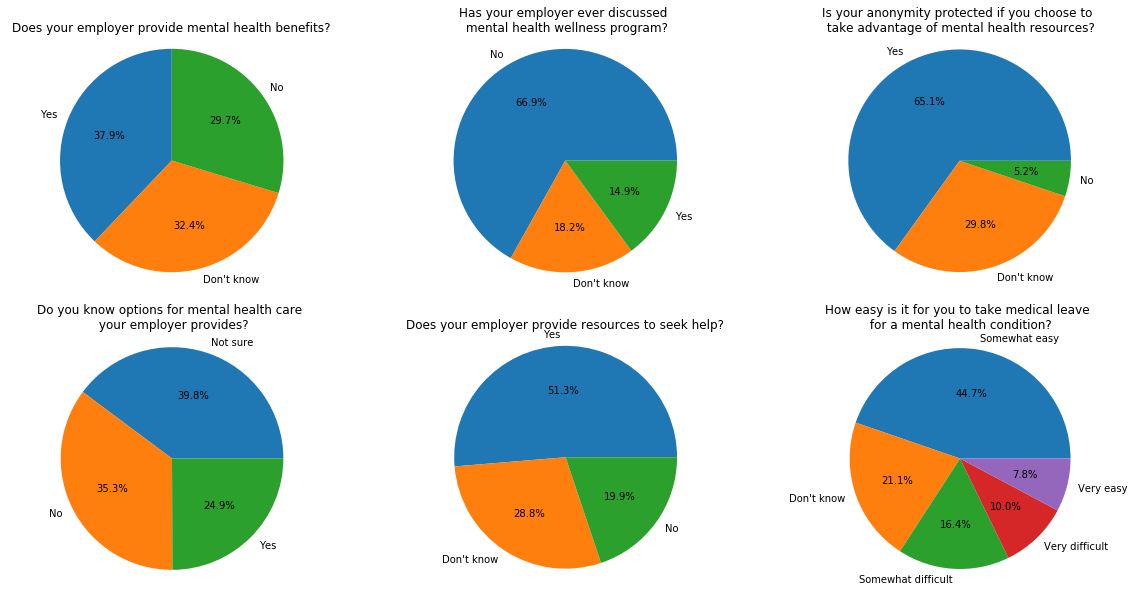

In [12]:
#use pie charts to visualize company policies including mental health benefits,mental health wellness program, anonymity protection, mental health care options,resources to seek help, and easiness to take medical leave
company_policy=['benefits','wellness_program','care_options','seek_help','anonymity','leave']
f4, ax4= plt.subplots(nrows=2,ncols=3, figsize=(20,10))
ax4[0,0].pie(list(mhdata['benefits'].value_counts()),labels=['Yes', "Don't know", 'No'], autopct='%1.1f%%', startangle=90)
ax4[1,0].pie(list(mhdata['care_options'].value_counts()), labels=['Not sure', 'No', 'Yes'],autopct='%1.1f%%', startangle=0)
ax4[0,1].pie(list(mhdata['wellness_program'].value_counts()),  labels=['No', "Don't know", 'Yes'], autopct='%1.1f%%', startangle=0)
ax4[1,1].pie(list(mhdata['seek_help'].value_counts()),labels=['Yes', "Don't know", 'No'], autopct='%1.1f%%', startangle=0)
ax4[0,2].pie(list(mhdata['anonymity'].value_counts()), labels=['Yes', "Don't know", 'No'], autopct='%1.1f%%', startangle=0)
ax4[1,2].pie(list(mhdata['leave'].value_counts()),  labels=['Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult', 'Very easy'],
   autopct='%1.1f%%', startangle=0)

ax4[0,0].axis('equal')
ax4[1,0].axis('equal')
ax4[1,1].axis('equal')
ax4[0,1].axis('equal')
ax4[0,2].axis('equal')
ax4[1,2].axis('equal')

ax4[0,0].set_title('Does your employer provide mental health benefits?') 
ax4[1,0].set_title('Do you know options for mental health care \n your employer provides?')
ax4[1,1].set_title('Does your employer provide resources to seek help?')
ax4[0,1].set_title('Has your employer ever discussed \n mental health wellness program?')
ax4[0,2].set_title('Is your anonymity protected if you choose to \n take advantage of mental health resources?')
ax4[1,2].set_title('How easy is it for you to take medical leave \n for a mental health condition?')

3.5 Willingness to seek mental health help

Text(0.5, 1.0, 'Would you bring up a physical health issue \n with a potential employer in an interview?')

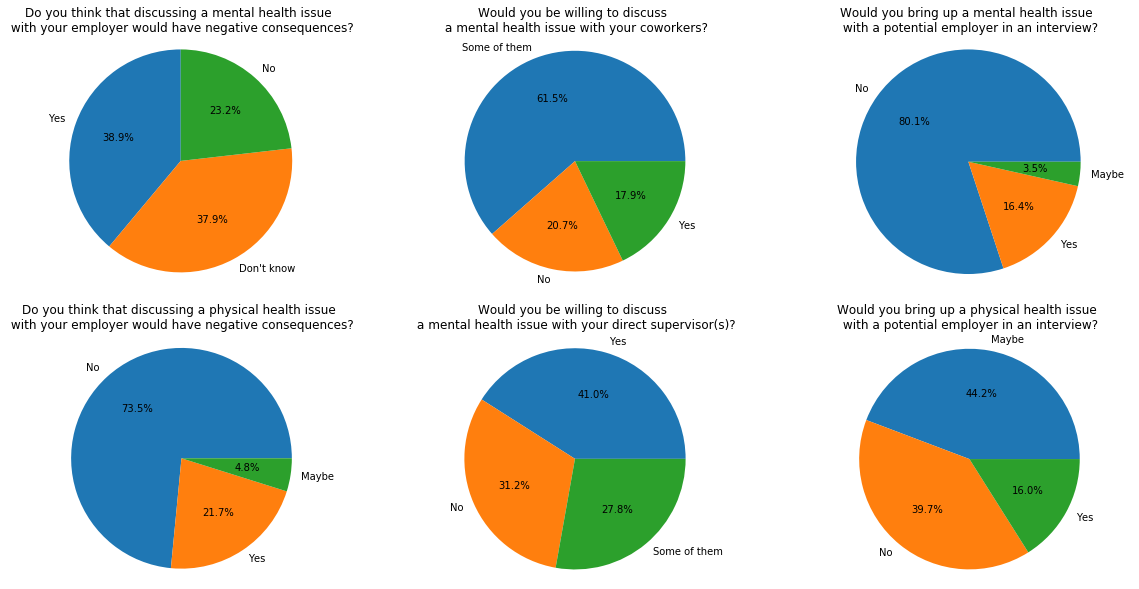

In [13]:
#use pie charts to visualize willingness to seek mental health help.
willingness=['mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview']
f5, ax5= plt.subplots(nrows=2,ncols=3, figsize=(20,10))
ax5[0,0].pie(list(mhdata['mental_health_consequence'].value_counts()), labels=['Yes', "Don't know", 'No'], autopct='%1.1f%%', startangle=90)
ax5[1,0].pie(list(mhdata['phys_health_consequence'].value_counts()),  labels=['No', 'Yes', 'Maybe'], autopct='%1.1f%%', startangle=0)
ax5[0,1].pie(list(mhdata['coworkers'].value_counts()),  labels=['Some of them', 'No', 'Yes'],  autopct='%1.1f%%', startangle=0)
ax5[1,1].pie(list(mhdata['supervisor'].value_counts()), labels=['Yes', 'No', 'Some of them'], autopct='%1.1f%%', startangle=0)
ax5[0,2].pie(list(mhdata['mental_health_interview'].value_counts()), labels=['No', 'Yes', 'Maybe'],    autopct='%1.1f%%', startangle=0)
ax5[1,2].pie(list(mhdata['phys_health_interview'].value_counts()), labels=['Maybe', 'No', 'Yes'], autopct='%1.1f%%', startangle=0)

ax5[0,0].axis('equal')
ax5[1,0].axis('equal')
ax5[1,1].axis('equal')
ax5[0,1].axis('equal')
ax5[0,2].axis('equal')
ax5[1,2].axis('equal')

ax5[0,0].set_title('Do you think that discussing a mental health issue \n with your employer would have negative consequences?') 
ax5[1,0].set_title('Do you think that discussing a physical health issue \n with your employer would have negative consequences?')
ax5[1,1].set_title('Would you be willing to discuss \n a mental health issue with your direct supervisor(s)?')
ax5[0,1].set_title('Would you be willing to discuss \n a mental health issue with your coworkers?')
ax5[0,2].set_title('Would you bring up a mental health issue \n with a potential employer in an interview?')
ax5[1,2].set_title('Would you bring up a physical health issue \n with a potential employer in an interview?')

**4.Explore correlation between company policy and willingness to seek mental health resources/help**

In [14]:
#define functions to factorize data
def fac(x):
    for i in x:
        if i!='Yes'and i!='No':
            x.replace(i,0,inplace =True)
            break
    x.replace("Yes",1,inplace =True)
    x.replace("No",-1,inplace=True)
    
def facneg(x):
    for i in x:
        if i!='Yes'and i!='No':
            x.replace(i,0,inplace =True)
            break
    x.replace("Yes",-1,inplace =True)
    x.replace("No",1,inplace=True)

In [15]:
#factorize variables for correlation analysis:No support/negative consequence=-1,neutral=0, Support/positive consequence=1
var_3=["benefits","care_options","wellness_program","seek_help","anonymity",'coworkers','supervisor','mental_health_interview','phys_health_interview']
#factorize variables for correlation analysis: negative consequence=-1,no negative consequence=1
var_neg=["mental_health_consequence",'phys_health_consequence']
#data = pd.read_csv('../input/survey_2014.csv')

for v in var_3:
    fac(mhdata[v])
for v in var_neg:
    facneg(mhdata[v])
mhdata['leave'].replace({'Somewhat easy':1,"Don't know":0,'Somewhat difficult':-1,'Very easy':2,'Very difficult':-2},inplace=True)

mhdata.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,1,1,1,0,1,-1,0,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,0,0,1,-1,-1,-1,-1,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,-1,1,1,1,1,1,1,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,-1,-1,-1,0,-1,0,0,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,0,1,1,0,1,1,1,Don't know,No,NaN


In [16]:
#corr analysis between company policy and willingness to seek mental health resources/help
mhdata[company_policy+willingness].corr()

,benefits,wellness_program,care_options,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
benefits,1.000000,0.409212,0.298130,0.490430,0.246840,0.128554,0.036210,0.068316,0.017011,0.043638,-0.033318,-0.096817
wellness_program,0.409212,1.000000,0.289768,0.618131,0.269670,0.153214,0.118701,0.026634,0.075158,0.124800,0.013472,-0.047383
care_options,0.298130,0.289768,1.000000,0.276866,0.304109,0.052118,0.024922,-0.004737,0.030227,0.082192,0.011686,-0.033045
seek_help,0.490430,0.618131,0.276866,1.000000,0.233175,0.120532,0.123873,0.068569,0.031079,0.111424,0.011762,-0.056926
anonymity,0.246840,0.269670,0.304109,0.233175,1.000000,0.242229,0.235854,0.167316,0.115880,0.206102,0.089869,0.050866
leave,0.128554,0.153214,0.052118,0.120532,0.242229,1.000000,0.377881,0.221754,0.219978,0.296032,0.143326,0.023845
mental_health_consequence,0.036210,0.118701,0.024922,0.123873,0.235854,0.377881,1.000000,0.515619,0.443727,0.577153,0.301990,0.075323
phys_health_consequence,0.068316,0.026634,-0.004737,0.068569,0.167316,0.221754,0.515619,1.000000,0.227011,0.327712,0.089832,0.177647
coworkers,0.017011,0.075158,0.030227,0.031079,0.115880,0.219978,0.443727,0.227011,1.000000,0.574310,0.326344,0.144190
supervisor,0.043638,0.124800,0.082192,0.111424,0.206102,0.296032,0.577153,0.327712,0.574310,1.000000,0.324496,0.159597


Text(0.5, 1, 'Correlation analysis')

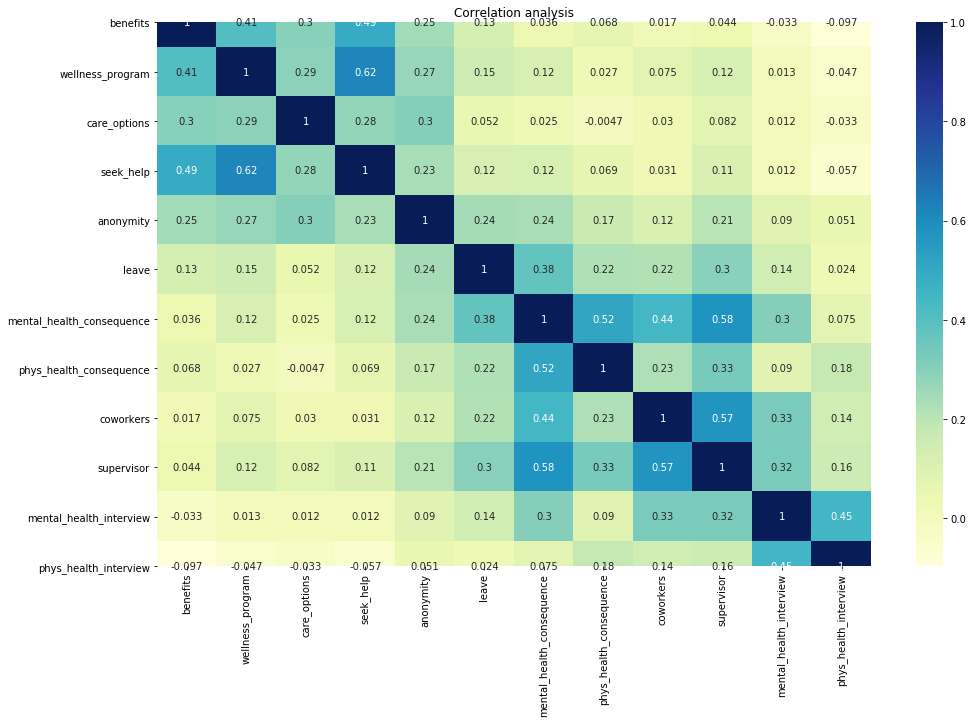

In [17]:
#use heatmap to visualize correlation analysis result
#According to the corr results, most of the correlations are positive. Further analysis should be done with blocks having high correlations.
#Highest correlations score: (wellness_program,seek_help)
plt.figure(figsize = (16,10))
sns.heatmap(mhdata[company_policy+willingness].corr(),cmap="YlGnBu",cbar=True,annot=True)
plt.title('Correlation analysis')

Text(0.5, 1, 'Correlation analysis (female)')

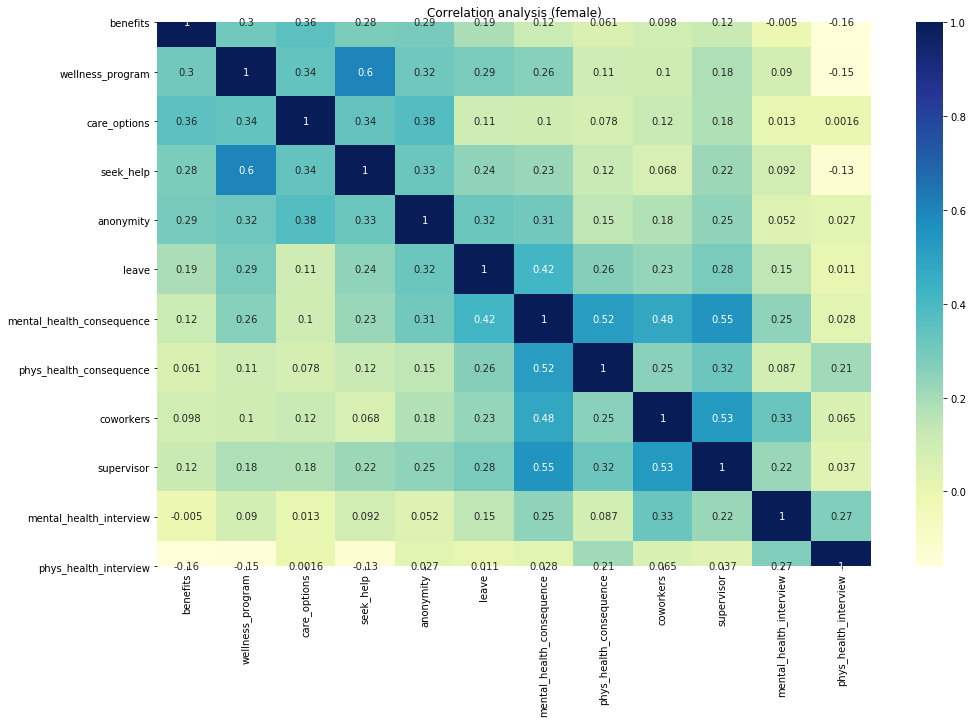

In [18]:
##use heatmap to visualize correlation analysis result with the female group
#Highest correlations score: (wellness_program,seek_help)
plt.figure(figsize = (16,10))
sns.heatmap(mhdata[mhdata['Gender']=='Female'][company_policy+willingness].corr(),cmap="YlGnBu",cbar=True,annot=True)
plt.title('Correlation analysis (female)')

Text(0.5, 1, 'Correlation analysis (Male)')

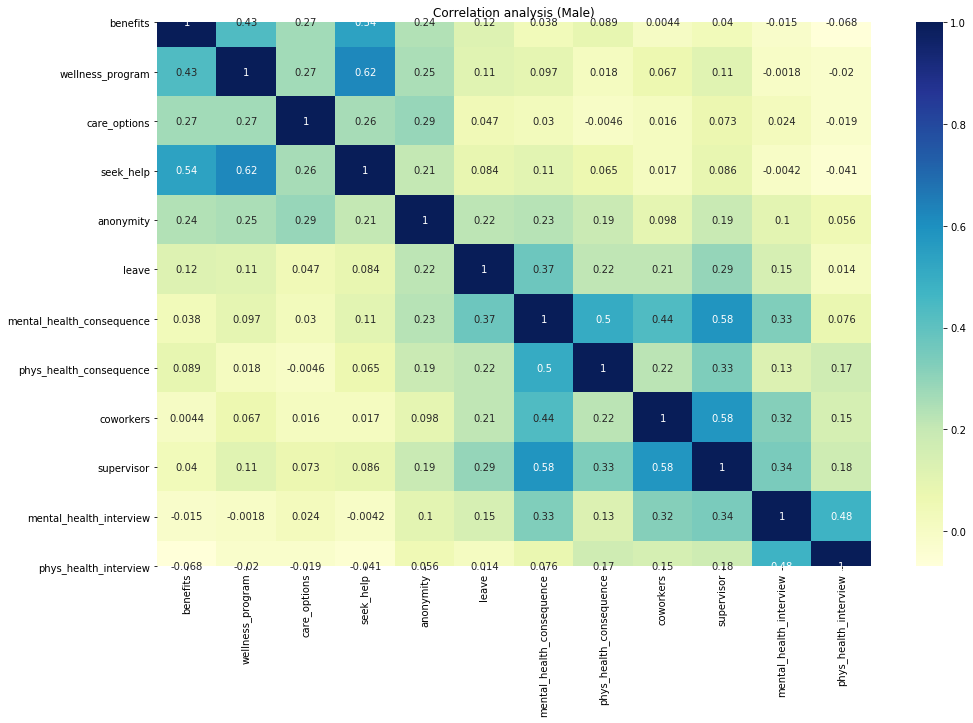

In [19]:
##use heatmap to visualize correlation analysis result with the male group
#Highest correlations score: (wellness_program,seek_help)
plt.figure(figsize = (16,10))
sns.heatmap(mhdata[mhdata['Gender']=='Male'][company_policy+willingness].corr(),cmap="YlGnBu",cbar=True,annot=True)
plt.title('Correlation analysis (Male)')